# Physics767 Execrcies sheet 2 Leonhard Moske

## Exercise 5

Generating all basis states of a $L$- Spin System with spin quantum number $s$.

In [1]:
import numpy as np
import itertools as it
import sympy

def genBasis(L, s): #L number of spins, s total spin
    posSpins = np.linspace(-s, s, int((2*s+1)), dtype = float)#generate List of all possible z projections
    #print("possible Spins ", posSpins)
    tmp = it.product(posSpins, repeat = L) # generate object that itterates over all combinations
    return np.asarray([i for i in tmp]) # assemble the list

In [2]:
Basis = genBasis(2,1.5)
print(Basis)

[[-1.5 -1.5]
 [-1.5 -0.5]
 [-1.5  0.5]
 [-1.5  1.5]
 [-0.5 -1.5]
 [-0.5 -0.5]
 [-0.5  0.5]
 [-0.5  1.5]
 [ 0.5 -1.5]
 [ 0.5 -0.5]
 [ 0.5  0.5]
 [ 0.5  1.5]
 [ 1.5 -1.5]
 [ 1.5 -0.5]
 [ 1.5  0.5]
 [ 1.5  1.5]]


## Exercis 6

calculate the matrix elements of the antiferromagnetic spin $s$ Hamiltonian of the Heisenberg model with open boundary conditions.

$H = J \sum_{i=1}^{L-1}\left[ \frac{1}{2} \left(S_i^+S_{i+1}^- + S_i^-S_{i+1}^+\right) + S_i^zS_{i+1}^z\right]$

In [3]:
lMaxhalf = 9 # maximal number of s=0.5
lMaxone = 7 # maximal number of s=1

In [4]:
def Splus(oldcoef, state, site, s): # site counted from 0 , passed with copy
                        # return new coefficient and new state 
    if (state[site] >= s): # if state is s the operator will return 0
        return 0, np.zeros(L)
    coef = np.sqrt(s*(s+1) - state[site] * (state[site] + 1)) #calculate new coef
    state[site] = state[site] + 1 # update spin state
    return coef*oldcoef, state 

def Sminus(oldcoef, state, site, s): # analog to Splus
    if (state[site] <= -s ):
        return 0, np.zeros(L)
    coef = np.sqrt(s*(s+1) - state[site] * (state[site] - 1))
    state[site] = state[site] - 1
    return coef*oldcoef, state 

def Sz(coef, state, site): 
    return state[site]*coef, state

def Hamiltonian(J, statei, L, statej, s):
    H = 0
    for i in range(L-1): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei), i+1, s), i, s)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), i+1, s), i, s)
        coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        if np.array_equal(state3, statej):
            H += coef3 * J
    return H

def calcMatrix(Basis, J, L, s):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i, j in it.product(range(len(Basis)), repeat=2):
        Matrix[i,j] = Hamiltonian(J, Basis[i], L, Basis[j], s)
    return Matrix


In [5]:
J = 1
s = 0.5
L = 3

matrix = calcMatrix(genBasis(L,s), J, L, s)

sympy.Matrix(matrix)

Matrix([
[0.5,   0,    0,   0,   0,    0,   0,   0],
[  0,   0,  0.5,   0,   0,    0,   0,   0],
[  0, 0.5, -0.5,   0, 0.5,    0,   0,   0],
[  0,   0,    0,   0,   0,  0.5,   0,   0],
[  0,   0,  0.5,   0,   0,    0,   0,   0],
[  0,   0,    0, 0.5,   0, -0.5, 0.5,   0],
[  0,   0,    0,   0,   0,  0.5,   0,   0],
[  0,   0,    0,   0,   0,    0,   0, 0.5]])

In [6]:
Evalues , Evectors = np.linalg.eigh(matrix) # calculate the eigenvalues

sympy.Matrix(Evalues)

Matrix([
[                 -1.0],
[                 -1.0],
[-5.43456338958359e-17],
[-5.43456338958359e-17],
[                  0.5],
[                  0.5],
[                  0.5],
[                  0.5]])

Ploting the lowest 4 Eigenvalues for $s=\frac{1}{2}$ and $s = 1$ as a function of $\frac{1}{L}$

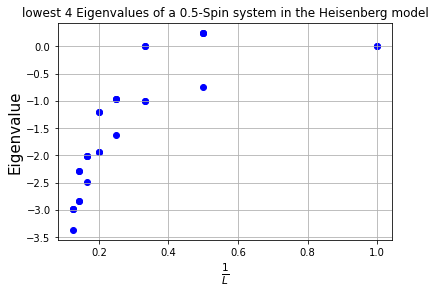

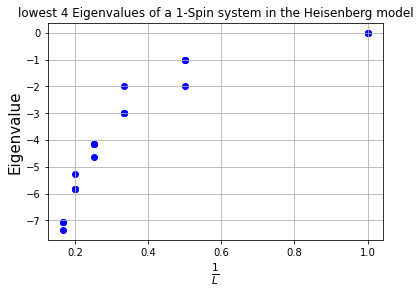

In [7]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer

J = 1
s = 0.5

measureTime = []
times = []
Length = []


for L in range(1,lMaxhalf):
    start = timer()
    matrix = calcMatrix(genBasis(L,s), J, L, s)
    Evalues , Evectors = np.linalg.eigh(matrix) # calculate the eigenvalues
    if len(Evalues) >= 4: # print the lowest 4 Eigenvalues
        plt.scatter([1/L]*4, np.sort(Evalues)[:4], color = "blue")
    else:
        plt.scatter([1/L]*len(Evalues), np.sort(Evalues), color = "blue")
    times.append(timer() - start)
    Length.append(L)

plt.title(f"lowest 4 Eigenvalues of a {s}-Spin system in the Heisenberg model")
plt.xlabel(r"$\frac{1}{L}$", fontsize = 15)
plt.ylabel("Eigenvalue", fontsize = 15)
plt.grid()
plt.show()

s = 1

measureTime.append([Length, times])
times = []
Length = []

for L in range(1,lMaxone):
    start = timer()
    matrix = calcMatrix(genBasis(L,s), J, L, s)
    Evalues , Evectors = np.linalg.eigh(matrix) # calculate the eigenvalues
    if len(Evalues) >= 4: #print the lowest 4 eigenvalues
        plt.scatter([1/L]*4, np.sort(Evalues)[:4], color = "blue")
    else:
        plt.scatter([1/L]*len(Evalues), np.sort(Evalues), color = "blue")
    times.append(timer() - start)
    Length.append(L)
    
measureTime.append([Length, times])
times = []
Length = []

plt.title(f"lowest 4 Eigenvalues of a {s}-Spin system in the Heisenberg model")
plt.xlabel(r"$\frac{1}{L}$", fontsize = 15)
plt.ylabel("Eigenvalue", fontsize = 15)
plt.grid()
plt.show()

## Exercise 7

Show that the Hamiltonian commutes with the total $z$ projection and use it to generate a block diagonal hamiltonian

In [8]:
def totalZ(state, L):
    totalZ = 0
    for i in range(L):
        totalZ += Sz(1, state, i)[0]
    return totalZ

def totalZmatrix(Basis, L):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.zeros((len(Basis),len(Basis))) # since we know that the basisstates are eigenstates of totalZ we only have to compute the diagonal 
    for i in range(len(Basis)):
        Matrix[i,i] = totalZ(Basis[i], L)
    return Matrix

# def splitBasisfast(Basis, L):
#     totalZofBasis = [totalZ(state, L) for state in Basis]
#     return [Basis[totalZofBasis == totalZ(i)] for i in Basis]

def splitBasis(Basis, L):
    splitBasis= []
    sortedBasis = sorted(Basis, key = lambda state : (totalZ(state, L)))
    tmpBasis = []
    oldz = totalZ(sortedBasis[0],L)
    for state in sortedBasis:
        z = totalZ(state, L)
        if z != oldz:
            splitBasis.append(tmpBasis)
            tmpBasis = [state]
            oldz = z
        else:
            tmpBasis.append(state)
            oldz = z
    splitBasis.append(tmpBasis)  
    return splitBasis

Calculating the commutator to show that the Hamiltonian and the total Spin operator have the same eigenbasis.

In [9]:
L = 4 # change it how you like
s = 0.5 # change it how you like


zMatrix = totalZmatrix(genBasis(L, s),L)
hMatrix = calcMatrix(genBasis(L,s),J,L,s)

sympy.Matrix(np.matmul(zMatrix, hMatrix) - np.matmul(hMatrix, zMatrix)) # calculating the commutator of the totalZ matrix and the hamiltonian
                                                                        # it should always be 0

Matrix([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

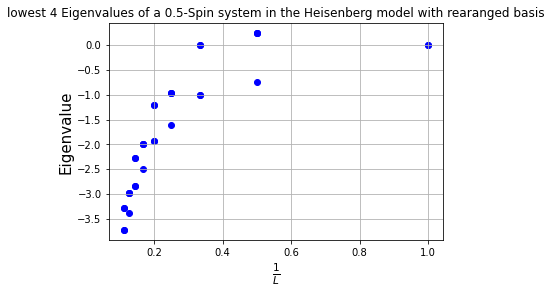

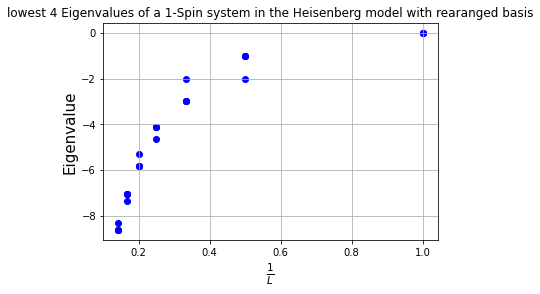

In [10]:
J = 1
s = 0.5


for L in range(1,lMaxhalf+1):
    start = timer()
    Basis = splitBasis(genBasis(L,s),L)# sort the basis by the total spin
    allEvalues = []
    for stotal in Basis:
        matrix = calcMatrix(stotal, J, L, s)
        #print(matrix)
        Evalues , Evectors = np.linalg.eigh(matrix) # calculate the eigenvalues
        allEvalues = np.append(allEvalues , Evalues)
    allEvalues = allEvalues.flatten()
    #print(allEvalues)
    if len(allEvalues) >= 4: # print the lowest 4 Eigenvalues
        plt.scatter([1/L]*4, np.sort(allEvalues)[:4], color = "blue")
    else:
        plt.scatter([1/L]*len(allEvalues), np.sort(allEvalues), color = "blue")
    times.append(timer() - start)
    Length.append(L)

measureTime.append([Length, times])
times = []
Length = []

plt.title(f"lowest 4 Eigenvalues of a {s}-Spin system in the Heisenberg model with rearanged basis")
plt.xlabel(r"$\frac{1}{L}$", fontsize = 15)
plt.ylabel("Eigenvalue", fontsize = 15)
plt.grid()
plt.show()

s = 1
    
for L in range(1,lMaxone+1):
    start = timer()
    #print(genBasis(L,s), J, L, s)
    Basis = splitBasis(genBasis(L,s),L)# sort the basis by the total spin
    #print(Basis)
    allEvalues = []
    #print(allEvalues)
    for stotal in Basis:
        matrix = calcMatrix(stotal, J, L, s)
        Evalues , Evectors = np.linalg.eigh(matrix) # calculate the eigenvalues
        #print(L, Evalues, allEvalues)
        allEvalues = np.append(allEvalues , Evalues)
    allEvalues = allEvalues.flatten()
    if len(allEvalues) >= 4: # print the lowest 4 Eigenvalues
        plt.scatter([1/L]*4, np.sort(allEvalues)[:4], color = "blue")
    else:
        plt.scatter([1/L]*len(allEvalues), np.sort(allEvalues), color = "blue")
    times.append(timer() - start)
    Length.append(L)
    
measureTime.append([Length, times])
times = []
Length = []


plt.title(f"lowest 4 Eigenvalues of a {s}-Spin system in the Heisenberg model with rearanged basis")
plt.xlabel(r"$\frac{1}{L}$", fontsize = 15)
plt.ylabel("Eigenvalue", fontsize = 15)
plt.grid()
plt.show()

With a rearagned basis i can add one state more than without. 

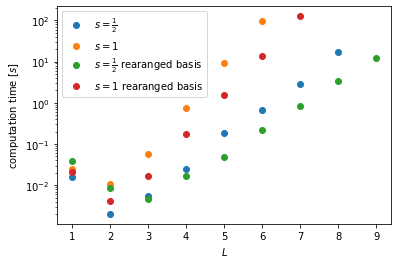

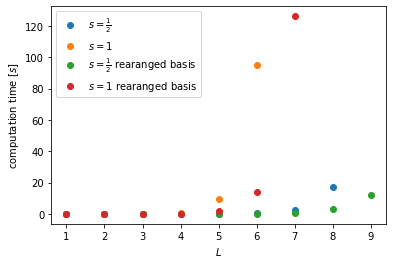

In [11]:

labels = [r"$s= \frac{1}{2}$", r"$s= 1$",r"$s= \frac{1}{2}$ rearanged basis", r"$s= 1$ rearanged basis"]

for i, x in enumerate(measureTime):
    plt.scatter(x[0], x[1], label = labels[i])


plt.xlabel(r"$L$")
plt.ylabel(r"computation time [$s$]")
plt.yscale("log")
plt.legend()
plt.show()

for i, x in enumerate(measureTime):
    plt.scatter(x[0], x[1], label = labels[i])


plt.xlabel(r"$L$")
plt.ylabel(r"computation time [$s$]")
plt.legend()
plt.show()